In [84]:
import pandas as pd
from datetime import timedelta

# Read the stock market data from the CSV file
input_csv_file = "sp500_tickers_A-D_1min_1pppix/ANET_1min.txt"
dff = pd.read_csv(input_csv_file)

# dff['Date'] = pd.to_datetime(dff['2014-06-06 09:52:00']).dt.date
# dff['Time'] = pd.to_datetime(dff['2014-06-06 09:52:00']).dt.time
dff['Timestamp'] = pd.to_datetime(dff['2014-06-06 09:52:00'])
dff.rename(columns={'13.8125': 'Open', '14.1475': 'High', '13.8125.1': 'Low', '14.1275': 'Close', '5761904': 'Volume'}, inplace=True)
dff.drop(['2014-06-06 09:52:00'], axis =1) # Drop the existing data and time column as separated column is available
dff = dff[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']] # Rearranging the columns in a particular order

print(dff.head())


            Timestamp     Open     High      Low    Close   Volume
0 2014-06-06 09:53:00  14.1275  14.1450  13.8500  13.9725  1127432
1 2014-06-06 09:54:00  13.9725  14.1850  13.8750  14.1775  1030860
2 2014-06-06 09:55:00  14.1675  14.1875  14.0500  14.1850   716264
3 2014-06-06 09:56:00  14.1600  14.2500  14.0700  14.2300   678156
4 2014-06-06 09:57:00  14.2125  14.2500  14.1275  14.1550   340516


In [85]:
start_time = pd.to_datetime("2016-10-18 09:30:00")
end_time = pd.to_datetime("2016-10-18 16:02:00")
#which_date = pd.to_datetime("").date()
dff2 = dff.loc[(dff['Timestamp'] >= start_time) & (dff['Timestamp'] <= end_time)]# Filtering values from 9:30 am to 4 pm on a particular date
print(dff2)

                 Timestamp     Open     High      Low    Close  Volume
192216 2016-10-18 09:30:00  20.4175  20.4175  20.4175  20.4175    9292
192217 2016-10-18 09:32:00  20.2600  20.2600  20.2600  20.2600     520
192218 2016-10-18 09:34:00  20.4200  20.4200  20.4200  20.4200     400
192219 2016-10-18 09:37:00  20.4175  20.4200  20.4175  20.4195    1628
192220 2016-10-18 09:42:00  20.4000  20.4050  20.3800  20.3800    3400
...                    ...      ...      ...      ...      ...     ...
192435 2016-10-18 15:56:00  20.2450  20.2475  20.2425  20.2425    5464
192436 2016-10-18 15:57:00  20.2425  20.2475  20.2425  20.2450    4000
192437 2016-10-18 15:58:00  20.2475  20.2475  20.2325  20.2350   11796
192438 2016-10-18 15:59:00  20.2350  20.2350  20.2050  20.2125   37852
192439 2016-10-18 16:02:00  20.2150  20.2150  20.2150  20.2150   69092

[224 rows x 6 columns]


In [86]:
from datetime import datetime, time

date_component = datetime.now().date()  # You can replace this with the desired date

# Create a datetime.datetime object by combining date and time components
time_component = time(9, 30, 0)  # Replace with the desired time
datetime_combined = datetime.combine(date_component, time_component)

# Print the resulting datetime.datetime object
print(datetime_combined)

2023-09-13 09:30:00


In [87]:
# Define a function for linear extrapolation
def linear_extrapolate(before, after, target_timestamp):
    time_diff = (target_timestamp - before['Timestamp']).total_seconds() / 60  # Convert to minutes
    price_diff = after['Open'] - before['Open']
    estimated_price = before['Open'] + (price_diff / (after['Timestamp'] - before['Timestamp']).total_seconds() / 60) * time_diff
    return estimated_price

# Create a new DataFrame to store the extrapolated data
extrapolated_data = []

# Iterate through the DataFrame to fill in missing timestamps
for i in range(len(dff2) - 1):
    current_row = dff2.iloc[i]
    next_row = dff2.iloc[i + 1]
    time_diff = (next_row['Timestamp'] - current_row['Timestamp']).total_seconds() / 60  # Convert to minutes

    if time_diff > 1:
        for j in range(1, int(time_diff)):
            target_timestamp = current_row['Timestamp'] + timedelta(minutes=j)
            estimated_price = linear_extrapolate(current_row, next_row, target_timestamp)
            extrapolated_data.append([target_timestamp, estimated_price, estimated_price, estimated_price, estimated_price, 0])

# Append the extrapolated data to the original DataFrame
extrapolated_dff2 = pd.DataFrame(extrapolated_data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# new_column_name = "Date"
# new_column_values = dff2['Date']

# # Use the DataFrame.insert() method
# extrapolated_dff2.insert(0, new_column_name, new_column_values)
dff3 = pd.concat([dff2, extrapolated_dff2])
dff3 = dff3.sort_values(by='Timestamp')
dff3 = dff3[:-2]
print(dff3)

                 Timestamp       Open       High        Low      Close  Volume
192216 2016-10-18 09:30:00  20.417500  20.417500  20.417500  20.417500    9292
0      2016-10-18 09:31:00  20.417478  20.417478  20.417478  20.417478       0
192217 2016-10-18 09:32:00  20.260000  20.260000  20.260000  20.260000     520
1      2016-10-18 09:33:00  20.260022  20.260022  20.260022  20.260022       0
192218 2016-10-18 09:34:00  20.420000  20.420000  20.420000  20.420000     400
...                    ...        ...        ...        ...        ...     ...
192435 2016-10-18 15:56:00  20.245000  20.247500  20.242500  20.242500    5464
192436 2016-10-18 15:57:00  20.242500  20.247500  20.242500  20.245000    4000
192437 2016-10-18 15:58:00  20.247500  20.247500  20.232500  20.235000   11796
192438 2016-10-18 15:59:00  20.235000  20.235000  20.205000  20.212500   37852
167    2016-10-18 16:00:00  20.234998  20.234998  20.234998  20.234998       0

[391 rows x 6 columns]


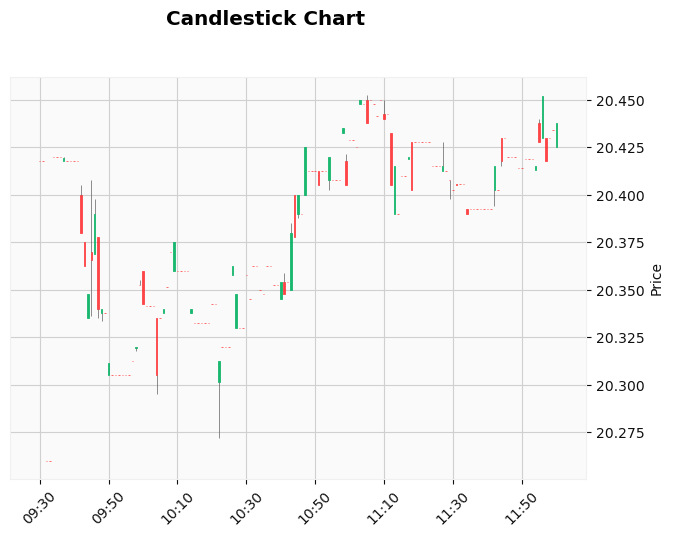

In [88]:
import mplfinance as mpf
end_time = pd.to_datetime("2016-10-18 12:00:00")
dff4 = dff3.loc[(dff3['Timestamp'] >= start_time) & (dff3['Timestamp'] <= end_time)]# Filtering values from 9:30 am to 4 pm on a particular date
dff4.set_index("Timestamp", inplace=True)
mpf.plot(dff4, type="candle", title="Candlestick Chart", style="yahoo")

In [89]:
extrapolated_data_next_day = []

start_time = pd.to_datetime("2016-10-19 09:30:00")
end_time = pd.to_datetime("2016-10-19 16:02:00")
dff_test_next_day = dff.loc[(dff['Timestamp'] >= start_time) & (dff['Timestamp'] <= end_time)]# Filtering values from 9:30 am to 4 pm on a particular date
# Iterate through the DataFrame to fill in missing timestamps
for i in range(len(dff_test_next_day) - 1):
    current_row = dff_test_next_day.iloc[i]
    next_row = dff_test_next_day.iloc[i + 1]
    time_diff = (next_row['Timestamp'] - current_row['Timestamp']).total_seconds() / 60  # Convert to minutes

    if time_diff > 1:
        for j in range(1, int(time_diff)):
            target_timestamp = current_row['Timestamp'] + timedelta(minutes=j)
            estimated_price = linear_extrapolate(current_row, next_row, target_timestamp)
            extrapolated_data_next_day.append([target_timestamp, estimated_price, estimated_price, estimated_price, estimated_price, 0])

# Append the extrapolated data to the original DataFrame
extrapolated_dff2_next_day = pd.DataFrame(extrapolated_data_next_day, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# new_column_name = "Date"
# new_column_values = dff2['Date']

# # Use the DataFrame.insert() method
# extrapolated_dff2.insert(0, new_column_name, new_column_values)
dff3_next_day = pd.concat([dff_test_next_day, extrapolated_dff2_next_day])
dff3_next_day = dff3_next_day.sort_values(by='Timestamp')
dff3_next_day = dff3_next_day[:-2]
print(dff3_next_day)

                 Timestamp       Open       High        Low      Close  Volume
192440 2016-10-19 09:30:00  20.190000  20.190000  20.190000  20.190000   10244
192441 2016-10-19 09:31:00  20.276200  20.276200  20.266000  20.266000     904
192442 2016-10-19 09:32:00  20.287500  20.335000  20.250000  20.335000   10288
0      2016-10-19 09:33:00  20.287495  20.287495  20.287495  20.287495       0
1      2016-10-19 09:34:00  20.287490  20.287490  20.287490  20.287490       0
...                    ...        ...        ...        ...        ...     ...
192726 2016-10-19 15:56:00  20.505000  20.505000  20.487500  20.487500   18800
192727 2016-10-19 15:57:00  20.492500  20.492500  20.487500  20.487500    3600
192728 2016-10-19 15:58:00  20.485000  20.485000  20.474500  20.475000   10416
192729 2016-10-19 15:59:00  20.475000  20.477500  20.465000  20.475000   10700
100    2016-10-19 16:00:00  20.475000  20.475000  20.475000  20.475000       0

[391 rows x 6 columns]


In [90]:
def normdata(data):
    mini = data.min()
    maxa = data.max()
    x = data

    y = (x- mini) / (maxa - mini)
    return y

In [91]:
dff3['Normalized_Close'] = normdata(dff3['Close'])
dff3['Normalized_Volume'] = normdata(dff3['Volume'])
dff3['Normalized_Open'] = normdata(dff3['Open'])
dff3['Normalized_High'] = normdata(dff3['High'])
dff3['Normalized_Low'] = normdata(dff3['Low'])

print(len(dff3['Normalized_Open']))
print(dff3['Normalized_Open'].head(50))

391
192216    0.845361
0         0.845271
192217    0.195876
1         0.195968
192218    0.855670
2         0.855669
3         0.855668
192219    0.845361
4         0.845357
5         0.845353
6         0.845349
7         0.845345
192220    0.773196
192221    0.670103
192222    0.505155
192223    0.649485
192224    0.644536
192225    0.680412
192226    0.515464
8         0.515445
192227    0.381443
9         0.381445
10        0.381446
11        0.381447
12        0.381448
13        0.381449
14        0.381451
192228    0.412371
192229    0.440000
192230    0.577320
192231    0.608247
192232    0.530722
15        0.530719
16        0.530717
192233    0.505155
17        0.505156
192234    0.515464
192235    0.571959
192236    0.649485
192237    0.608247
18        0.608242
19        0.608237
20        0.608232
21        0.608227
192238    0.515464
192239    0.494845
22        0.494848
23        0.494850
24        0.494852
25        0.494855
Name: Normalized_Open, dtype: float64


In [92]:
import torch
import torch.nn as nn

In [93]:
class LSTMModel(nn.Module):
    def __init__(self, input_d, hidden_d, layer_d, output_d):
        super(LSTMModel, self).__init__()
        
        self.hidden_dim = hidden_d
        self.layer_dim = layer_d

        # LSTM model 
        self.lstm = nn.LSTM(input_d, hidden_d, layer_d, batch_first=True) 

        self.fc = nn.Linear(hidden_d, output_d)

    def forward(self, x):
    
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :]) 
        #out = torch.sigmoid(out)
        return out
    
input_dim = 4
hidden_dim = 600
output_dim = 1
layer_dim = 1

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#step 4: calculating cross entropy loss
#loss_fn = nn.BCELoss()
#loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MSELoss()

#step 5: optimizer 
learning_rate = 0.03
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [94]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Read data, convert to NumPy arrays
X = dff3[['Normalized_Open', 'Normalized_High', 'Normalized_Low', 'Normalized_Close']][:-1].to_numpy() # Converting the 4 columns into a 2-D Numpy array
#X = df2[['High', 'Low', 'Close', 'Volume']][:-1].to_numpy() # Converting the 5 columns into a 2-D Numpy array

y = dff3['Normalized_Close'][1:].to_numpy()
#y = df2['Open'][1:].to_numpy()

# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)
# print(y)
# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(X.shape)
print(y)
# create DataLoader, then take one batch
loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=50)
for X_batch, y_batch in loader:
    #print(y_batch)
    break

torch.Size([390, 1, 4])
tensor([[0.8468],
        [0.2041],
        [0.2042],
        [0.8571],
        [0.8571],
        [0.8571],
        [0.8551],
        [0.8469],
        [0.8469],
        [0.8469],
        [0.8469],
        [0.6939],
        [0.6224],
        [0.5612],
        [0.6347],
        [0.7347],
        [0.5306],
        [0.5306],
        [0.5204],
        [0.4131],
        [0.3878],
        [0.3878],
        [0.3878],
        [0.3878],
        [0.3878],
        [0.3878],
        [0.4184],
        [0.4482],
        [0.5816],
        [0.5408],
        [0.5355],
        [0.5355],
        [0.5355],
        [0.3878],
        [0.5102],
        [0.5306],
        [0.5763],
        [0.6531],
        [0.6727],
        [0.6122],
        [0.6122],
        [0.6122],
        [0.6122],
        [0.5306],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5408],
        [0.5408],
        [0.4184],
        [0.4490],
        [0.4490],
    

In [95]:
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
 
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=380/390, shuffle=False)
print(y_test)
# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
 
# Train the model
n_epochs = 300
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
print(y_pred)
acc = (abs(y_pred- y_test) <.013).float().mean()
acc = float(acc)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print(((sum((y_pred - y_test)**2))**0.5)/len(X_test))
#test_loss = loss_fn(y_pred, y_test).item()  # Calculate the loss and get the scalar value
#test_rmse = np.sqrt(test_loss)  # Take the square root of the scalar loss
#test_rmse = np.sqrt(loss_fn(y_pred, y_test))
#print("Model accuracy: %.2f%%" % (acc*100))
#print("Model Loss:", test_rmse)

tensor([[0.1478],
        [0.1584],
        [0.1531],
        [0.1531],
        [0.1429],
        [0.1327],
        [0.1429],
        [0.1020],
        [0.0102],
        [0.1020]])
tensor([[0.1486],
        [0.1706],
        [0.1852],
        [0.1863],
        [0.1708],
        [0.1720],
        [0.1668],
        [0.1663],
        [0.1517],
        [0.0776]], grad_fn=<AddmmBackward0>)
[0.01729749]


In [96]:


max_p_next_day = dff3_next_day['Close'].max()
min_p_next_day = dff3_next_day['Close'].min()

dff3_next_day['Normalized_Close'] = normdata(dff3_next_day['Close'])
dff3_next_day['Normalized_Volume'] = normdata(dff3_next_day['Volume'])
dff3_next_day['Normalized_Open'] = normdata(dff3_next_day['Open'])
dff3_next_day['Normalized_High'] = normdata(dff3_next_day['High'])
dff3_next_day['Normalized_Low'] = normdata(dff3_next_day['Low'])

X = dff3_next_day[['Normalized_Close', 'Normalized_High', 'Normalized_Low', 'Normalized_Close']][:390].to_numpy() # Converting the 5 columns into a 2-D Numpy array
y = dff3_next_day['Normalized_Close'][1:391].to_numpy()
#print(X)


X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
# for X_batch, y_batch in loader:
#     #print(y_batch)
#     break

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, shuffle=False)
#print(X_test)
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
actual_price  = dff3_next_day['Close'][2:391]
#print(actual_price)

model.eval()
y_pred = model(X_test)
predicted_price = y_pred*(max_p_next_day - min_p_next_day) + min_p_next_day
#print(predicted_price)
#acc = (abs(y_pred- y_test) <.013).float().mean()
#acc = float(acc)
predicted_price = predicted_price.detach().numpy()
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print(((sum((y_pred - y_test)**2))**0.5))
print(predicted_price.reshape(1,-1))
actual_price = actual_price.to_numpy()
#print(actual_price)


[0.7966796]
[[20.283014 20.329567 20.30302  20.303017 20.256182 20.243517 20.235987
  20.21532  20.170202 20.180054 20.170727 20.110134 20.072975 20.060278
  20.074453 20.161114 20.161104 20.177027 20.16366  20.12692  20.147837
  20.133562 20.113016 20.13872  20.134546 20.11712  20.109495 20.157658
  20.163626 20.162447 20.127514 20.137484 20.126173 20.135853 20.135853
  20.136864 20.127834 20.15016  20.144487 20.14449  20.161104 20.170202
  20.181541 20.170202 20.170204 20.170204 20.182499 20.180584 20.180586
  20.193846 20.21035  20.20927  20.224134 20.22234  20.235521 20.243353
  20.253588 20.25328  20.234013 20.243803 20.245855 20.245857 20.254934
  20.24393  20.236082 20.237185 20.226044 20.2255   20.227417 20.243244
  20.241732 20.243244 20.248466 20.252007 20.263433 20.272095 20.25988
  20.25505  20.25629  20.266232 20.272083 20.277115 20.277115 20.277113
  20.277113 20.273495 20.254534 20.254221 20.25067  20.252176 20.25067
  20.25629  20.241053 20.22659  20.232796 20.22659  20

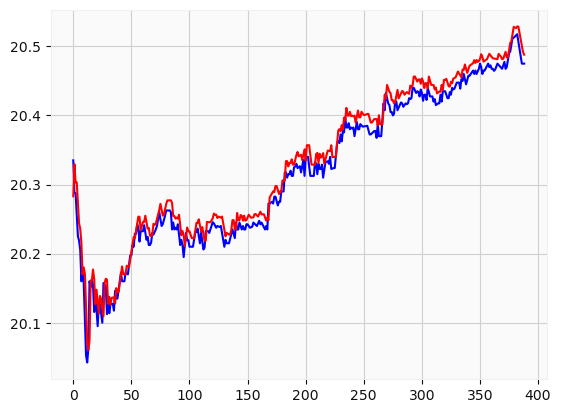

In [97]:
import matplotlib.pyplot as plt
t = np.arange(389) # Taking the data of 99 timestamps hence used this
plt.plot(t, actual_price , color = 'blue') 

plt.plot(t, predicted_price, color = 'red')

In [98]:
class TradingModule:
    def __init__(self, ema_period = 7):
        self.cash_balance = 100000  # Starting cash balance (100,000 in this example)
        self.qty = 0
        self.ema_period = ema_period
        self.ema_values = []  # Dictionary to store EMA values for each symbol
        self.commission = 0.0005 # Let the commission for trading be 0.05% of the total price of transaction made 
    def calculate_ema(self, price):
        if len(self.ema_values) >= self.ema_period:
            self.ema_values.pop(0)
        
        self.ema_values.append(price)

        if len(self.ema_values) < self.ema_period:
            return None

        ema = sum(self.ema_values) / len(self.ema_values)
        return ema
    
    def buy(self, amount, price):
        if self.cash_balance >= (1 + self.commission) * amount * price :
            self.qty += amount
            self.cash_balance -= (1 + self.commission) * amount * price
            print(f"Bought {amount} shares of at ${price} each.")

    def sell(self, amount, price):
        if self.qty >= amount:
            self.qty -= amount
            self.cash_balance += (1 - self.commission) * amount * price
            print(f"Sold {amount} shares at ${price} each.")

    def hold(self):
        pass  # Do nothing, simply hold existing positions

    def execute_strategy(self, current_price):
        ema = self.calculate_ema(current_price)
        if ema is not None:
            if current_price > ema:
                self.buy(125, current_price) # Buying and selling a fixed number of stocks every time
            elif current_price < ema:
                self.sell(125, current_price)
            else:
                self.hold()

    def outp(self):
        print(self.cash_balance)
        print(self.qty)

    # def print_portfolio(self):
    #     print("Portfolio:")
    #     for symbol, amount in self.portfolio.items():
    #         print(f"{symbol}: {amount} shares")
    #     print(f"Cash Balance: ${self.cash_balance}")




[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
Bought 125 shares of at $[20.161114] each.
[99998.73999023]
Bought 125 shares of at $[20.161104] each.
[99997.47851562]
Bought 125 shares of at $[20.177027] each.
[100000.19848633]
Bought 125 shares of at $[20.16366] each.
[99993.92553711]
Sold 125 shares at $[20.12692] each.
[99974.29785156]
Bought 125 shares of at $[20.147837] each.
[99980.88183594]
Sold 125 shares at $[20.133562] each.
[99972.48681641]
Sold 125 shares at $[20.113016] each.
[99963.5246582]
Sold 125 shares at $[20.13872] each.
[99968.69189453]
Sold 125 shares at $[20.134546] each.
[99966.91186523]
[99966.91186523]
[99966.91186523]
Bought 125 shares of at $[20.157658] each.
[99965.65209961]
Bought 125 shares of at $[20.163626] each.
[99965.13769531]
Bought 125 shares of at $[20.162447] each.
[99963.58300781]
Sold 125 shares at $[20.127514] each.
[99949.22509766]
Sold 125 

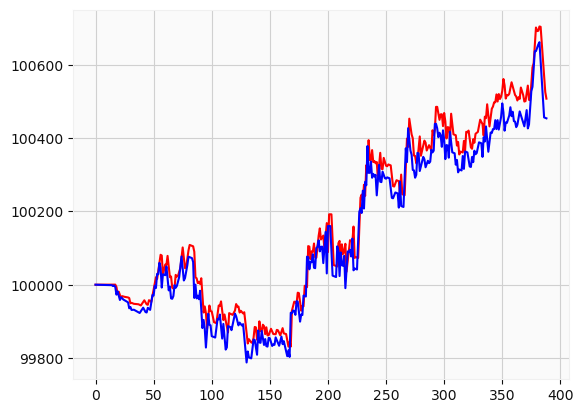

In [99]:
# Example usage:
if __name__ == "__main__":
    trading_module_pred = TradingModule()
    trading_module_actual = TradingModule()

    # Simulate a series of price updates for a hypothetical stock
    price_updates = [45, 48, 52, 55, 62, 58, 63, 60, 58, 57, 34, 45]

L = [0]*389 # Predicted List
M = [0]*389
for i, price in enumerate(predicted_price):
    #symbol = "XYZ"  # Replace with the actual symbol
    trading_module_pred.execute_strategy(price)
    #trading_module.outp()
    TotalValues_predicted = trading_module_pred.cash_balance + price * trading_module_pred.qty
    L[i] = TotalValues_predicted
    print(TotalValues_predicted)
    #trading_module.print_portfolio()
    #print("\n")
print("GAPPP")
for i, price in enumerate(actual_price):
    #symbol = "XYZ"  # Replace with the actual symbol
    trading_module_actual.execute_strategy(price)
    #trading_module.outp()
    TotalValues_actual = trading_module_actual.cash_balance + price * trading_module_actual.qty
    M[i] = TotalValues_actual
    print(TotalValues_actual)
h = np.arange(389)
plt.plot(h, L, color= 'red') # Trading with predicted Values
#asd = plt.twinx()
plt.plot(h, M, color ='blue') # TRading with actual Values
# df2['Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant

